In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
def load_data(name):
  image = cv2.imread(name)
  cv2_imshow(image)
  return image

In [3]:
def BGR2GRAY(image):
  return cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

In [4]:
def operator(name):
  image = load_data(name)
  image_gray = BGR2GRAY(image)
  histg = cv2.calcHist([image_gray] , [0] , None , [255] , [0,255])

  plt.bar(np.arange(255), np.squeeze(histg))
  plt.show()
  start = time.time()
  within = []

  for i in range(len(histg)):
    x , y = np.split(histg , [i])
    x1 = np.sum(x)/(image.shape[0] * image.shape[1])
    y1 = np.sum(y)/(image.shape[0] * image.shape[1])
    
    x2 = np.sum([j*t for j,t in enumerate(x)])/np.sum(x)
    y2 = np.sum([j*t for j,t in enumerate(y)])/np.sum(y)
    
    x3 = np.sum([(j-x2)**2*t for j,t in enumerate(x)])/np.sum(x)
    x3 = np.nan_to_num(x3)
    y3 = np.sum([(j-y2)**2*t for j,t in enumerate(y)])/np.sum(y)
    y3 = np.nan_to_num(y3)
    within.append(x1*x3 + y1*y3)
  m = np.argmin(within)

  algoTime = time.time() - start
  print("Time : " , algoTime)
  print("Threshold : " , m)

  (thresh , mask) = cv2.threshold(image_gray , m , 255 , cv2.THRESH_BINARY)
  cv2_imshow(mask)

  segmented_img = cv2.bitwise_and(image, image, mask=mask)
  cv2_imshow(segmented_img)

  # define kernel size
  kernel = np.ones((7, 7), np.uint8)
  # Remove unnecessary noise from mask
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

  segmented_img_kernel = cv2.bitwise_and(image, image, mask=mask)
  cv2_imshow(segmented_img_kernel)

  return segmented_img , segmented_img_kernel

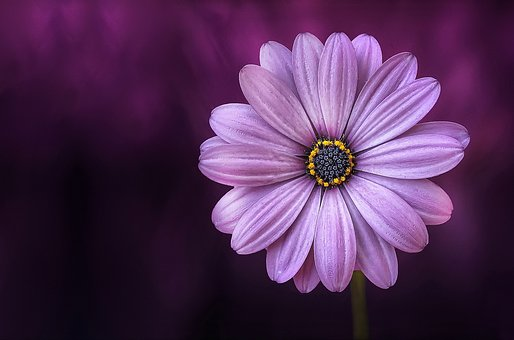

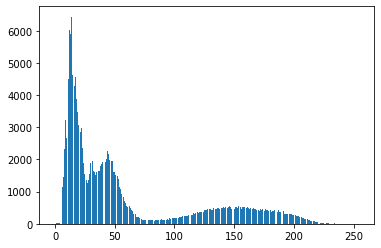

Time :  0.440523624420166
Threshold :  92


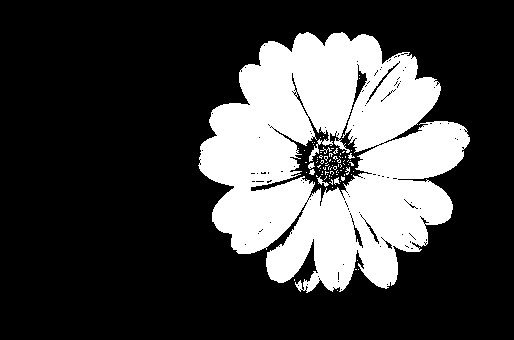

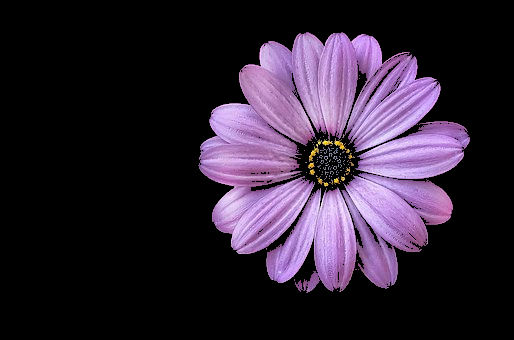

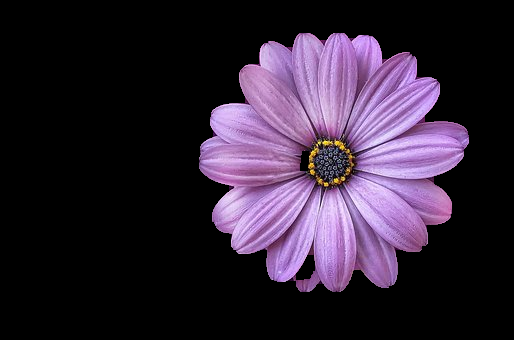

In [5]:
flower ,kernel_flower = operator("flower.jpg")

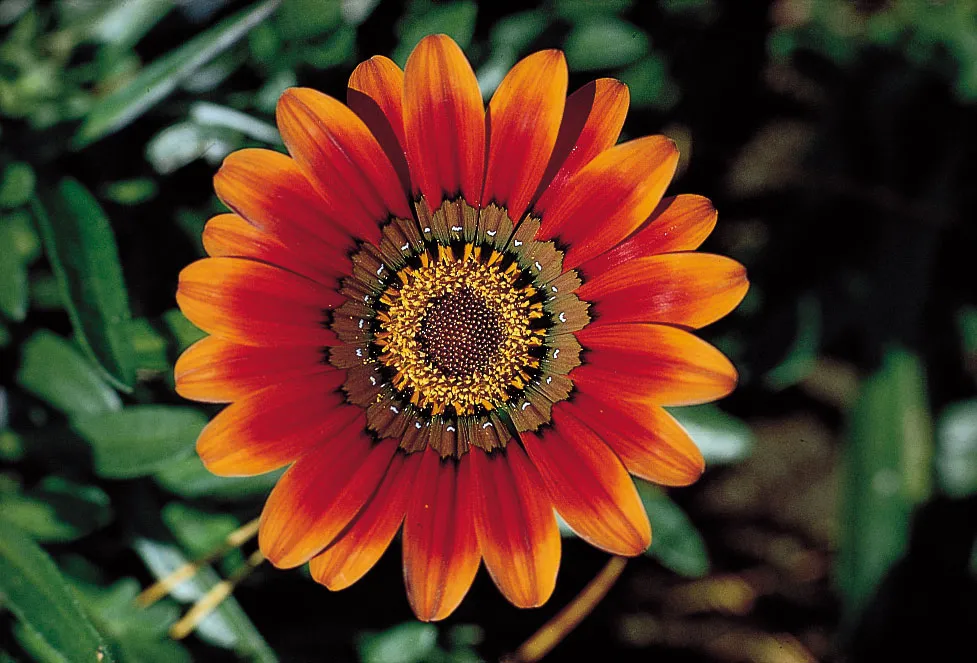

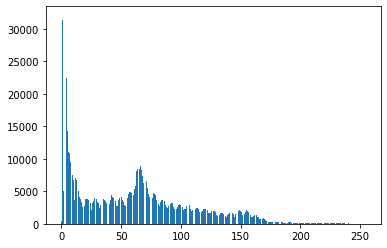

Time :  0.44048166275024414
Threshold :  74


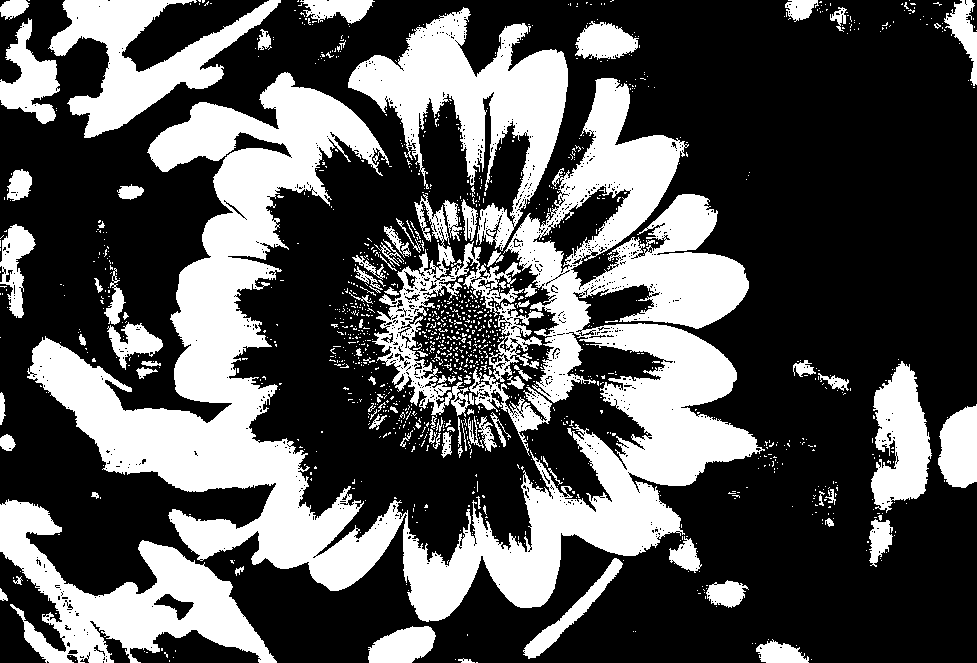

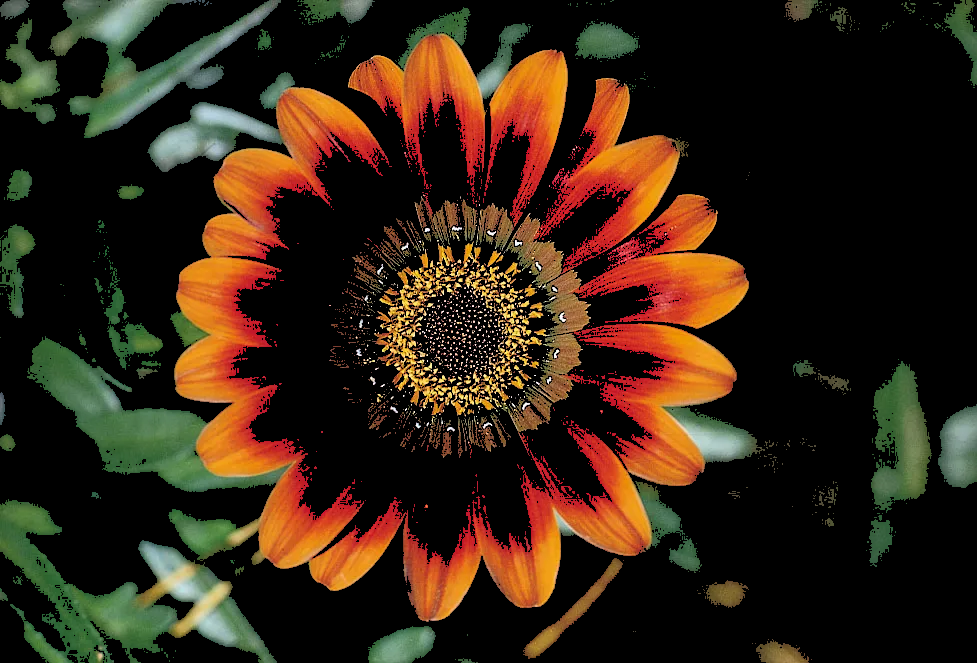

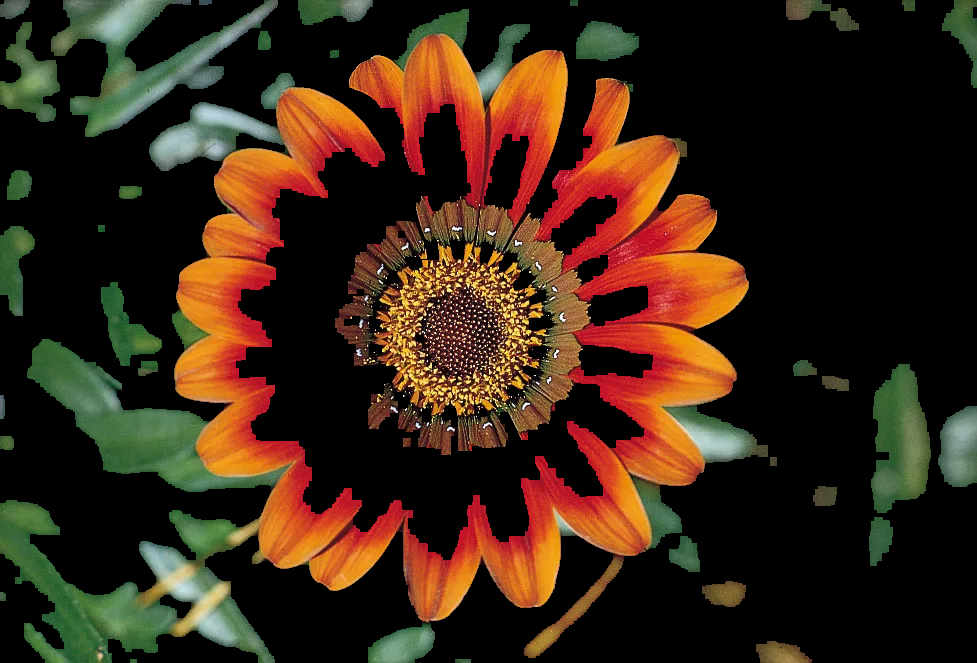

In [6]:
flower1 , kernel_flower1 = operator("flower1.png")

In [7]:
def accuracy(inputs, target):
  first = inputs.reshape(inputs.shape[0] * inputs.shape[1])
  second = target.reshape(inputs.shape[0] * inputs.shape[1])
  truth = 0
  for i in range(first.shape[0]):
    if (first[i] == second[i]).all():
      truth += 1
  
  return truth / first.shape[0]

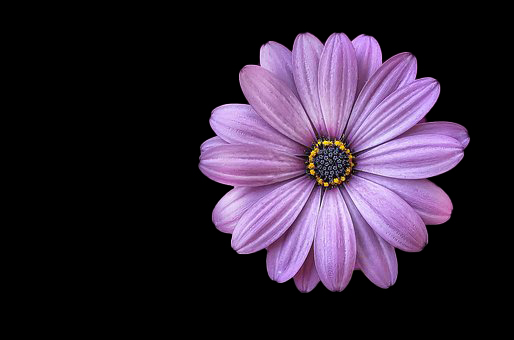

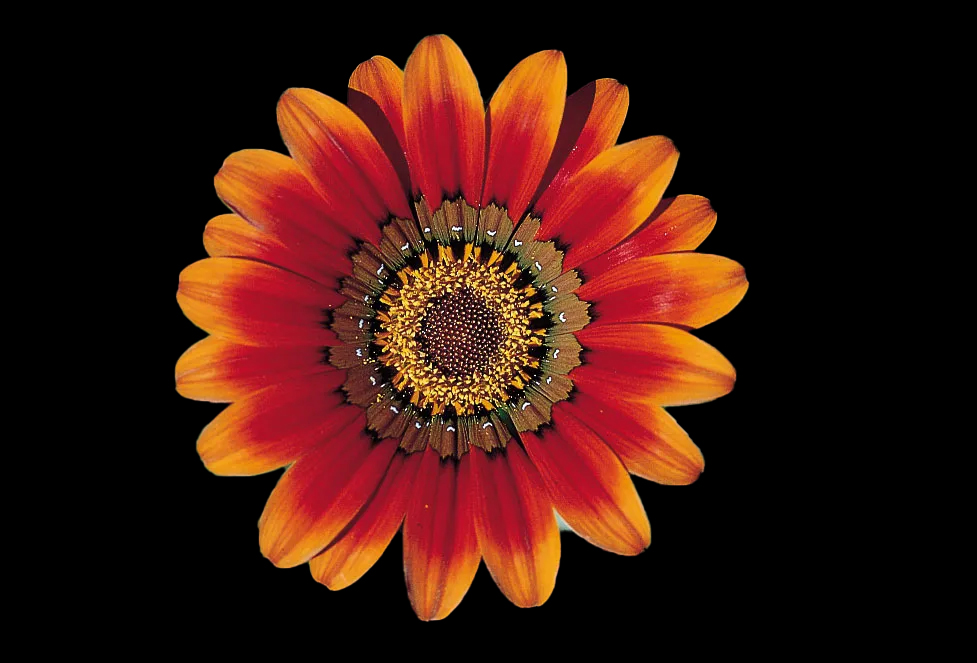

In [8]:
main_mask_flower = load_data("main_mask_flower.jpg")
main_mask_flower1 = load_data("main_mask_flower1.jpg")

In [9]:
accuracy(BGR2GRAY(main_mask_flower) , BGR2GRAY(flower))

0.9028210116731518

In [10]:
accuracy(BGR2GRAY(main_mask_flower) , BGR2GRAY(kernel_flower))

0.9195353627832455

In [11]:
accuracy(BGR2GRAY(main_mask_flower1) , BGR2GRAY(flower1))

0.6262962156754679

In [12]:
accuracy(BGR2GRAY(main_mask_flower1) , BGR2GRAY(kernel_flower1))

0.6458546571136131